In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data with correct encoding
df = pd.read_csv(
    r"C:\Users\kumkum trivedi\Downloads\archive (4)\DataCoSupplyChainDataset.csv",
    encoding='latin1',
    low_memory=False
)


In [3]:
df.columns.tolist()


['Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Id',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Email',
 'Customer Fname',
 'Customer Id',
 'Customer Lname',
 'Customer Password',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Customer Zipcode',
 'Department Id',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'Order Customer Id',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Order Status',
 'Order Zipcode',
 'Product Card Id',
 'Product Category Id',
 'Product Description',
 'Product Image',
 'Product Name',
 'Product P

In [4]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_')


In [6]:
for col in df.columns:
    if 'date' in col.lower():
        print(col)

order_date_(DateOrders)
shipping_date_(DateOrders)


In [7]:
# Convert correct date columns
df['order_date_(DateOrders)'] = pd.to_datetime(
    df['order_date_(DateOrders)'], errors='coerce'
)

df['shipping_date_(DateOrders)'] = pd.to_datetime(
    df['shipping_date_(DateOrders)'], errors='coerce'
)

# Drop invalid dates
df = df.dropna(subset=['order_date_(DateOrders)', 'shipping_date_(DateOrders)'])

# Create Lead Time
df['Delivery_Lead_Time'] = (
    df['shipping_date_(DateOrders)'] - df['order_date_(DateOrders)']
).dt.days

# Remove negative lead times
df = df[df['Delivery_Lead_Time'] >= 0]


In [9]:
sales_time = df.groupby(
    df['order_date_(DateOrders)'].dt.to_period('M')
)['Sales'].sum()


In [10]:
df[['order_date_(DateOrders)',
    'shipping_date_(DateOrders)',
    'Delivery_Lead_Time']].head()


,order_date_(DateOrders),shipping_date_(DateOrders),Delivery_Lead_Time
0,2018-01-31 22:56:00,2018-02-03 22:56:00,3
1,2018-01-13 12:27:00,2018-01-18 12:27:00,5
2,2018-01-13 12:06:00,2018-01-17 12:06:00,4
3,2018-01-13 11:45:00,2018-01-16 11:45:00,3
4,2018-01-13 11:24:00,2018-01-15 11:24:00,2


In [12]:
for col in df.columns:
    if 'cat' in col.lower() or 'product' in col.lower():
        print(col)


Category_Id
Category_Name
Order_Item_Product_Price
Product_Card_Id
Product_Category_Id
Product_Description
Product_Image
Product_Name
Product_Price
Product_Status


In [13]:
df.columns.tolist()


['Type',
 'Days_for_shipping_(real)',
 'Days_for_shipment_(scheduled)',
 'Benefit_per_order',
 'Sales_per_customer',
 'Delivery_Status',
 'Late_delivery_risk',
 'Category_Id',
 'Category_Name',
 'Customer_City',
 'Customer_Country',
 'Customer_Email',
 'Customer_Fname',
 'Customer_Id',
 'Customer_Lname',
 'Customer_Password',
 'Customer_Segment',
 'Customer_State',
 'Customer_Street',
 'Customer_Zipcode',
 'Department_Id',
 'Department_Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order_City',
 'Order_Country',
 'Order_Customer_Id',
 'order_date_(DateOrders)',
 'Order_Id',
 'Order_Item_Cardprod_Id',
 'Order_Item_Discount',
 'Order_Item_Discount_Rate',
 'Order_Item_Id',
 'Order_Item_Product_Price',
 'Order_Item_Profit_Ratio',
 'Order_Item_Quantity',
 'Sales',
 'Order_Item_Total',
 'Order_Profit_Per_Order',
 'Order_Region',
 'Order_State',
 'Order_Status',
 'Order_Zipcode',
 'Product_Card_Id',
 'Product_Category_Id',
 'Product_Description',
 'Product_Image',
 'Product_Name',
 'Product_P

In [14]:
for col in df.columns:
    if 'profit' in col.lower() or 'benefit' in col.lower():
        print(col)

Benefit_per_order
Order_Item_Profit_Ratio
Order_Profit_Per_Order


In [15]:
# Category column
category_col = [c for c in df.columns if 'category' in c.lower()][0]

# Sales column
sales_col = [c for c in df.columns if 'sales' in c.lower()][0]

# Profit column (profit / benefit)
profit_col = [c for c in df.columns 
              if ('profit' in c.lower()) or ('benefit' in c.lower())][0]

print(category_col, sales_col, profit_col)


Category_Id Sales_per_customer Benefit_per_order


In [16]:
category_summary = (
    df.groupby(category_col)[[sales_col, profit_col]]
      .sum()
      .sort_values(by=sales_col, ascending=False)
)

category_summary


,Sales_per_customer,Benefit_per_order
Category_Id,,
45,6.226935e+06,756220.767190
17,3.982857e+06,494636.919791
43,3.700784e+06,427455.568106
9,3.320251e+06,383011.098485
24,2.828708e+06,350421.029567
48,2.798044e+06,325146.960038
18,2.598494e+06,311902.820214
46,2.596454e+06,318451.430554
29,1.177186e+06,129813.960315


In [17]:
category_summary['Profit_Margin'] = (
    category_summary[profit_col] / category_summary[sales_col]
)

category_summary.sort_values('Profit_Margin', ascending=False)


,Sales_per_customer,Benefit_per_order,Profit_Margin
Category_Id,,,
34,9.403790e+03,1810.069992,0.192483
11,3.175136e+04,5258.390016,0.165611
74,5.485680e+03,900.710000,0.164193
2,2.390995e+04,3901.949953,0.163194
76,1.260069e+05,19102.849930,0.151602
3,8.436727e+04,12762.130067,0.151269
68,2.317655e+05,33443.010106,0.144297
6,4.007781e+04,5747.979996,0.143421
71,1.016873e+05,14436.319923,0.141968


In [18]:
df.groupby('Market')['Late_delivery_risk'].mean().sort_values(ascending=False)

df.groupby('Shipping_Mode')['Delivery_Lead_Time'].mean().sort_values()

category_summary


,Sales_per_customer,Benefit_per_order,Profit_Margin
Category_Id,,,
45,6.226935e+06,756220.767190,0.121443
17,3.982857e+06,494636.919791,0.124191
43,3.700784e+06,427455.568106,0.115504
9,3.320251e+06,383011.098485,0.115356
24,2.828708e+06,350421.029567,0.123880
48,2.798044e+06,325146.960038,0.116205
18,2.598494e+06,311902.820214,0.120032
46,2.596454e+06,318451.430554,0.122649
29,1.177186e+06,129813.960315,0.110275


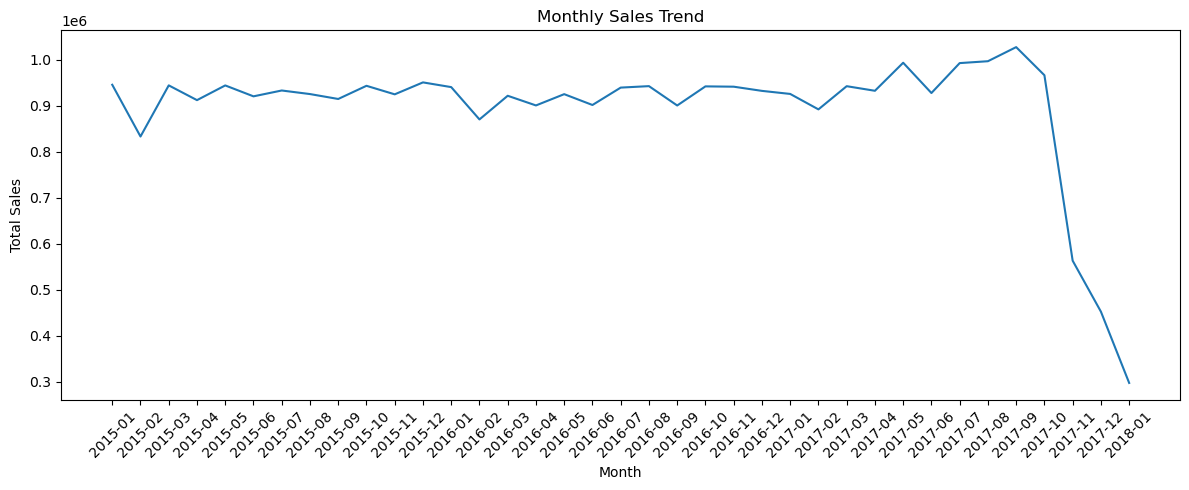

In [19]:
import matplotlib.pyplot as plt

monthly_sales = (
    df.groupby(df['order_date_(DateOrders)'].dt.to_period('M'))[sales_col]
      .sum()
)

monthly_sales.index = monthly_sales.index.astype(str)

plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


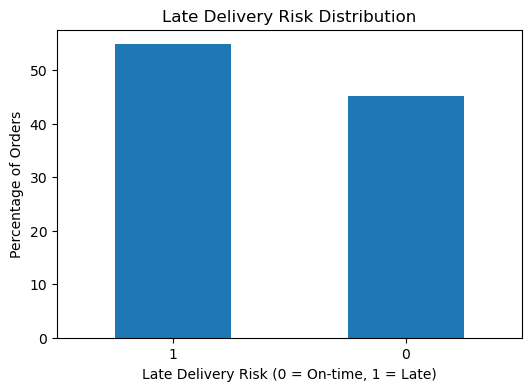

In [20]:
late_dist = df['Late_delivery_risk'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
late_dist.plot(kind='bar')
plt.title("Late Delivery Risk Distribution")
plt.xlabel("Late Delivery Risk (0 = On-time, 1 = Late)")
plt.ylabel("Percentage of Orders")
plt.xticks(rotation=0)
plt.show()


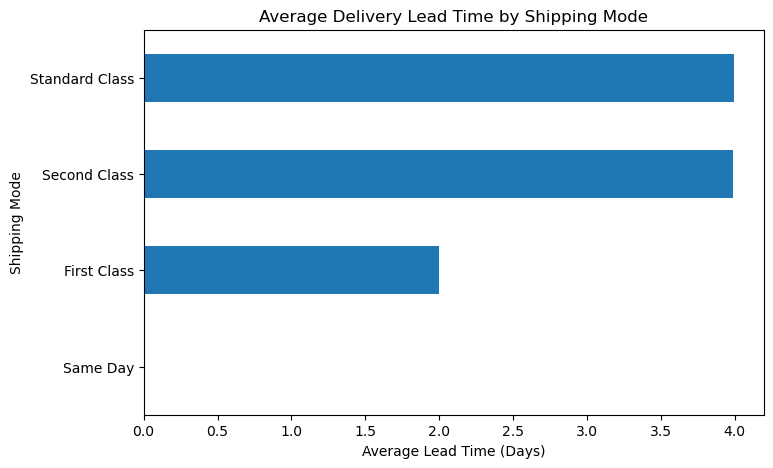

In [21]:
lead_time_mode = (
    df.groupby('Shipping_Mode')['Delivery_Lead_Time']
      .mean()
      .sort_values()
)

plt.figure(figsize=(8,5))
lead_time_mode.plot(kind='barh')
plt.title("Average Delivery Lead Time by Shipping Mode")
plt.xlabel("Average Lead Time (Days)")
plt.ylabel("Shipping Mode")
plt.show()


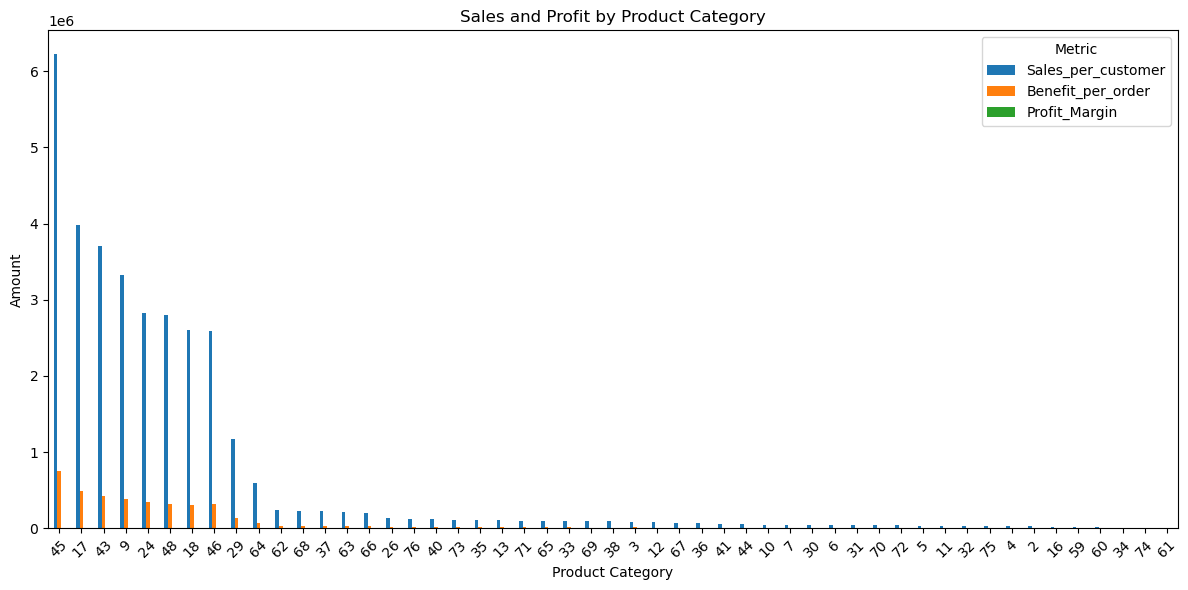

In [22]:
category_summary.plot(
    kind='bar',
    figsize=(12,6)
)

plt.title("Sales and Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


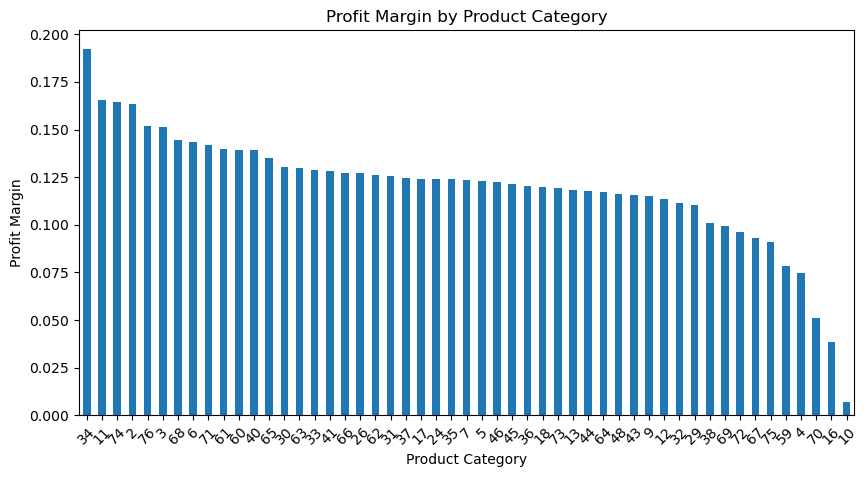

In [23]:
plt.figure(figsize=(10,5))
category_summary['Profit_Margin'].sort_values(ascending=False).plot(kind='bar')
plt.title("Profit Margin by Product Category")
plt.ylabel("Profit Margin")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#ABC VISUALIZATION 

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Identify product column safely
product_col = [c for c in df.columns if 'product' in c.lower()][0]

# Use previously detected sales column
print("Product column:", product_col)
print("Sales column:", sales_col)

# Aggregate sales by product
abc_df = (
    df.groupby(product_col)[sales_col]
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

# Calculate cumulative sales percentage
abc_df['Cumulative_Sales'] = abc_df[sales_col].cumsum()
abc_df['Cumulative_Percentage'] = abc_df['Cumulative_Sales'] / abc_df[sales_col].sum()

# Assign ABC categories
abc_df['ABC_Category'] = np.where(
    abc_df['Cumulative_Percentage'] <= 0.8, 'A',
    np.where(abc_df['Cumulative_Percentage'] <= 0.95, 'B', 'C')
)

abc_df.head()


Product column: Order_Item_Product_Price
Sales column: Sales_per_customer


,Order_Item_Product_Price,Sales_per_customer,Cumulative_Sales,Cumulative_Percentage,ABC_Category
0,399.980011,6.226935e+06,6.226935e+06,0.188384,A
1,59.990002,4.023535e+06,1.025047e+07,0.310109,A
2,299.980011,3.700784e+06,1.395125e+07,0.422069,A
3,99.989998,3.366984e+06,1.731824e+07,0.523931,A
4,50.000000,2.828708e+06,2.014695e+07,0.609509,A


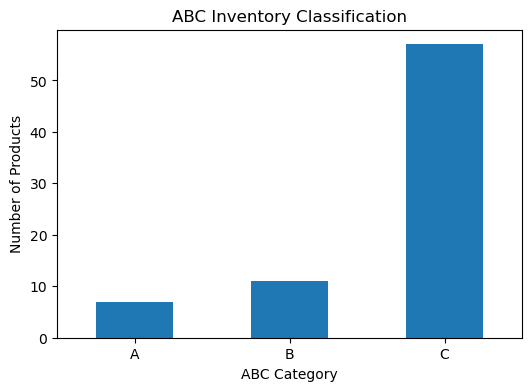

In [29]:
abc_counts = abc_df['ABC_Category'].value_counts().sort_index()

plt.figure(figsize=(6,4))
abc_counts.plot(kind='bar')
plt.title("ABC Inventory Classification")
plt.xlabel("ABC Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=0)
plt.show()

#INTERPRETAION 
Interpretation
A-category items represent a small proportion of products but contribute the majority of sales, highlighting the need for strict inventory control and high service levels for these items.

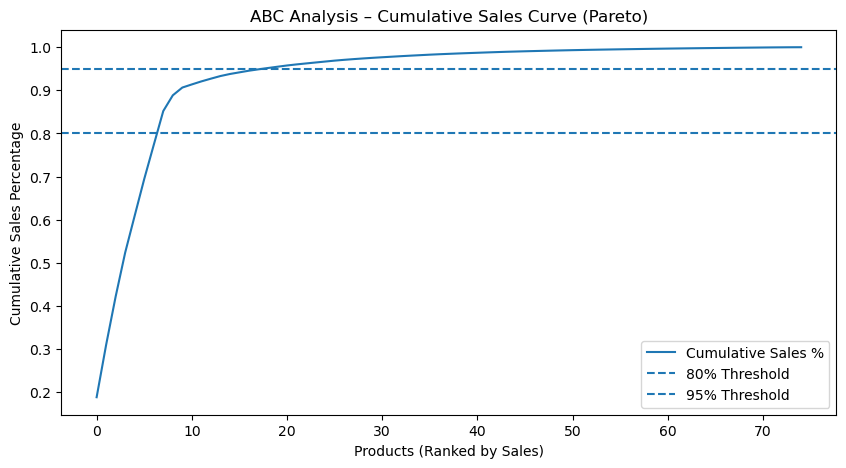

In [30]:
plt.figure(figsize=(10,5))

plt.plot(
    abc_df.index,
    abc_df['Cumulative_Percentage'],
    label='Cumulative Sales %'
)

plt.axhline(0.8, linestyle='--', label='80% Threshold')
plt.axhline(0.95, linestyle='--', label='95% Threshold')

plt.title("ABC Analysis – Cumulative Sales Curve (Pareto)")
plt.xlabel("Products (Ranked by Sales)")
plt.ylabel("Cumulative Sales Percentage")
plt.legend()
plt.show()

#INTERPRETAION
The Pareto curve confirms that approximately 20% of products generate nearly 80% of total sales. 
These A-category items require priority replenishment, tighter forecasting, and higher safety stock levels.


In [ ]:
abc_sales = abc_df.groupby('ABC_Category')[sales_col].sum()

plt.figure(figsize=(6,4))
abc_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Sales Contribution by ABC Category")
plt.ylabel("")
plt.show()
